In [1]:
import pandas as pd
import numpy as np
import darts
from darts import TimeSeries
import matplotlib.pyplot as plt

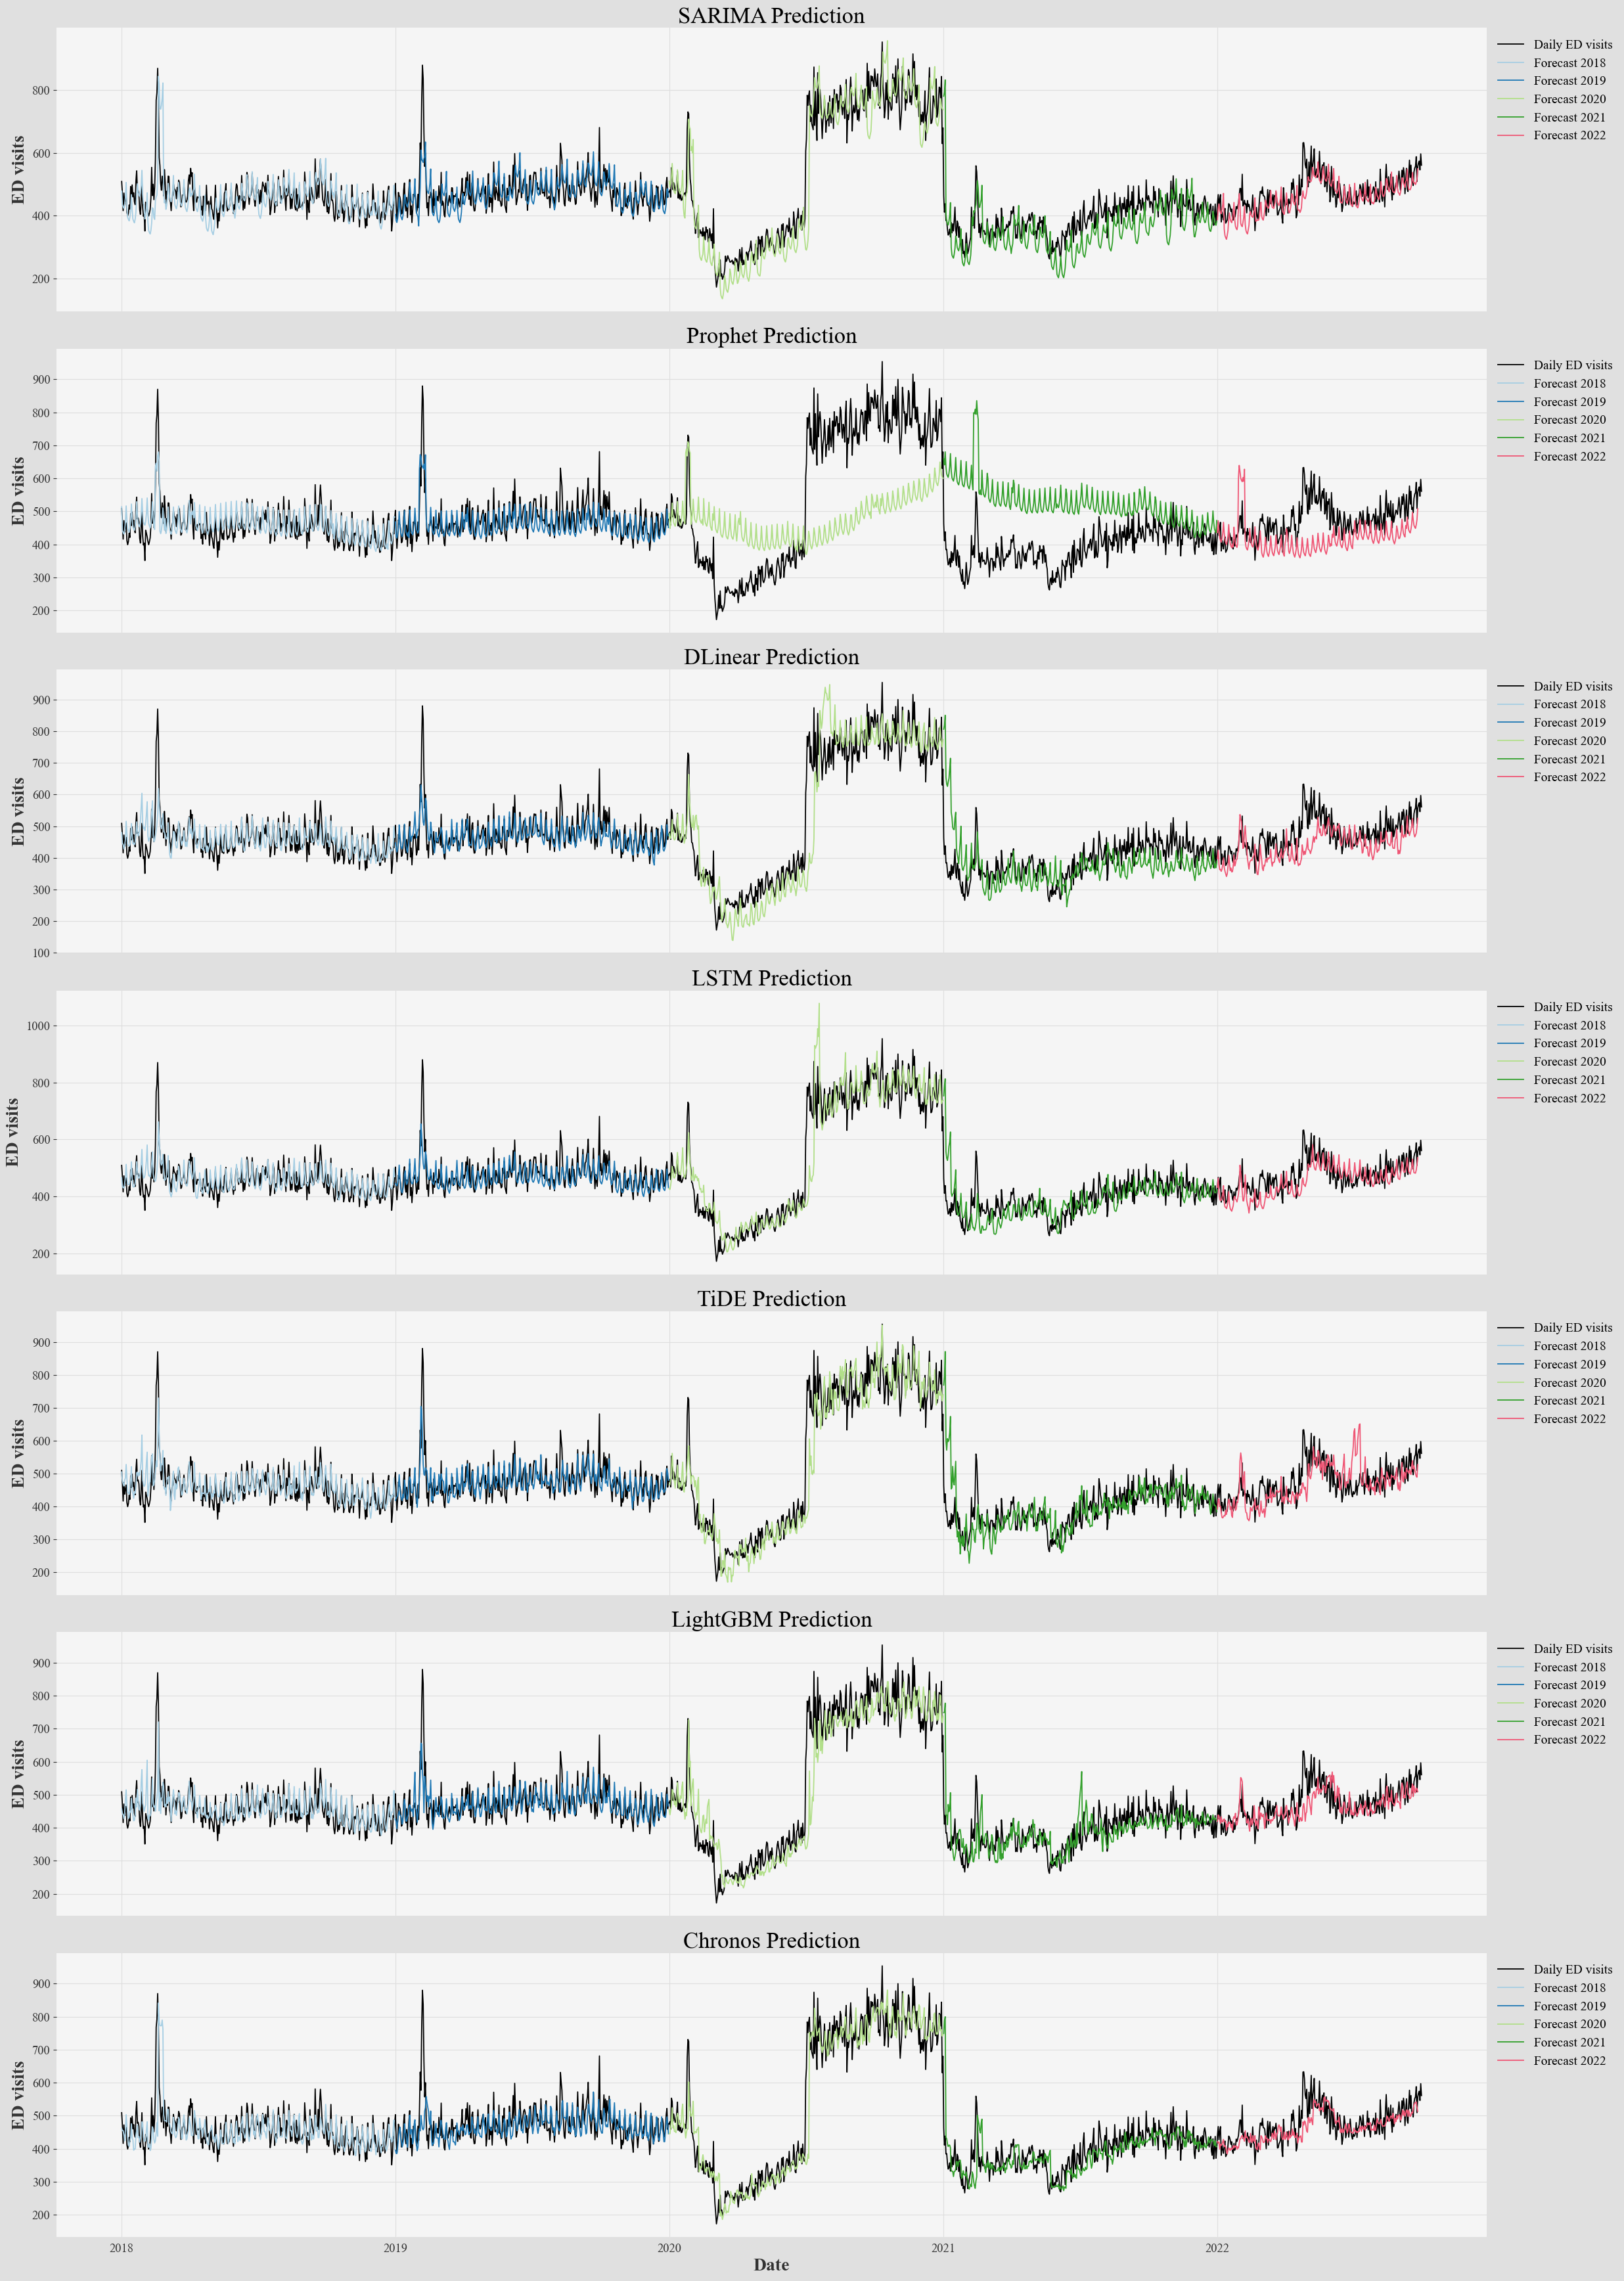

In [2]:
# Load original data
df = pd.read_csv('../DataSet/EDvisitfileLinkou.csv', encoding='ISO-8859-1')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.loc['2018-01-01':]
Original_series = df['No']

# Load model predictions
def load_predictions(file_path):
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.loc['2018-01-01':]
    return df['No']

SARIMAX_series = load_predictions('../Result/SARIMAX/Linkou/Linkou_SARIMAX_FH7.csv')
Prophet_series = load_predictions('../Result/Prophet/Linkou/Linkou_Prophet_FH7.csv')
DLinear_series = load_predictions('../Result/DLinear/Linkou/Linkou_DLinear_FH7.csv')
LSTM_series = load_predictions('../Result/LSTM/Linkou/Linkou_LSTM_FH7.csv')
TiDE_series = load_predictions('../Result/TiDE/Linkou/Linkou_TiDE_FH7.csv')
LightGBM_series = load_predictions('../Result/LightGBM/Linkou/Linkou_LightGBM_FH7.csv')
Chronos_series = load_predictions('../Result/Chronos/Linkou/Linkou_Chronos_FH7.csv')

# Prepare data for plotting by year
def prepare_yearly_series(series):
    yearly_series = {}
    for year in range(2018, 2023):
        yearly_series[year] = series.loc[f'{year}']
    return yearly_series

SARIMAX_yearly = prepare_yearly_series(SARIMAX_series)
Prophet_yearly = prepare_yearly_series(Prophet_series)
DLinear_yearly = prepare_yearly_series(DLinear_series)
LSTM_yearly = prepare_yearly_series(LSTM_series)
TiDE_yearly = prepare_yearly_series(TiDE_series)
LightGBM_yearly = prepare_yearly_series(LightGBM_series)
Chronos_yearly = prepare_yearly_series(Chronos_series)

# Set global font properties
plt.rcParams.update({'font.size': 16, 'font.family': 'serif', 'font.serif': 'Times New Roman'})

fig, axes = plt.subplots(7, 1, figsize=(25, 35), sharex=True, facecolor='#E0E0E0')

# Plotting

# Define a color palette
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#ef5675']

# Plot original series and predictions by year
# Plot original series and predictions by year
def plot_with_yearly_predictions(ax, original, yearly_predictions, title, xlabel=False):
    ax.plot(original.index, original.values, label='Daily ED visits', color='black')
    for i, year in enumerate(range(2018, 2023)):
        yearly_data = yearly_predictions[year]
        ax.plot(yearly_data.index, yearly_data.values, label=f'Forecast {year}', color=colors[i])
    if xlabel:
        ax.set_xlabel('Date', fontsize=20, fontfamily='Times New Roman')
    ax.set_title(title, fontdict={'fontsize': 25, 'fontfamily': 'Times New Roman'})
    ax.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_ylabel('ED visits', fontsize=20, fontfamily='Times New Roman')
    ax.grid(True)
    ax.set_facecolor('#F5F5F5')  # 设置子图背景色

# Plot each model's predictions
plot_with_yearly_predictions(axes[0], Original_series, SARIMAX_yearly, 'SARIMA Prediction')
plot_with_yearly_predictions(axes[1], Original_series, Prophet_yearly, 'Prophet Prediction')
plot_with_yearly_predictions(axes[2], Original_series, DLinear_yearly, 'DLinear Prediction')
plot_with_yearly_predictions(axes[3], Original_series, LSTM_yearly, 'LSTM Prediction')
plot_with_yearly_predictions(axes[4], Original_series, TiDE_yearly, 'TiDE Prediction')
plot_with_yearly_predictions(axes[5], Original_series, LightGBM_yearly, 'LightGBM Prediction')
plot_with_yearly_predictions(axes[6], Original_series, Chronos_yearly, 'Chronos Prediction', xlabel=True)

plt.tight_layout()
plt.savefig('Fig4.png')
plt.show()